# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [ ]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [ ]:
!rm SUSY.csv

In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

The data is provided as a comma separated file.

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [ ]:
!ls -lh

We see that we have 5 million datapoints.

In [ ]:
!wc -l SUSY.csv

We create a new file of the first half million. This is sufficient for our needs in this lab:

In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
ls -lh

In [ ]:
! wc -l SUSY-small.csv

Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [1]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [2]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [3]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [4]:
FeatureNames

['dPhi_r_b',
 'S_R',
 'M_Delta_R',
 'M_R',
 'M_TR_2',
 'axial_MET',
 'MET_rel',
 'R',
 'cos_theta_r1',
 'MT2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [6]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [7]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [8]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


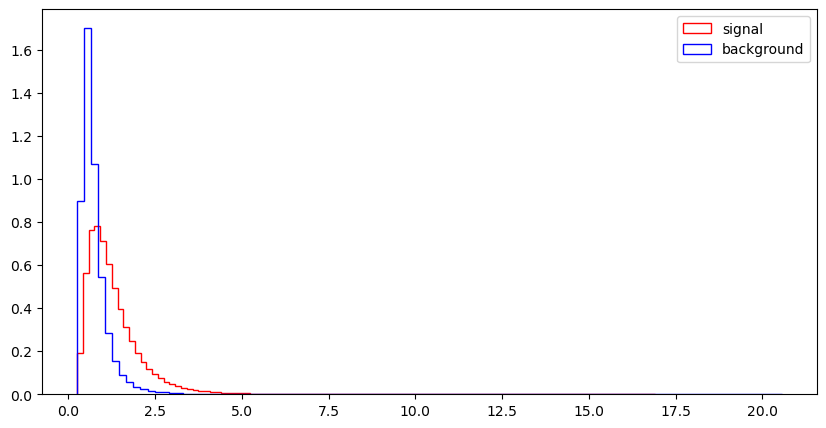

l_1_eta


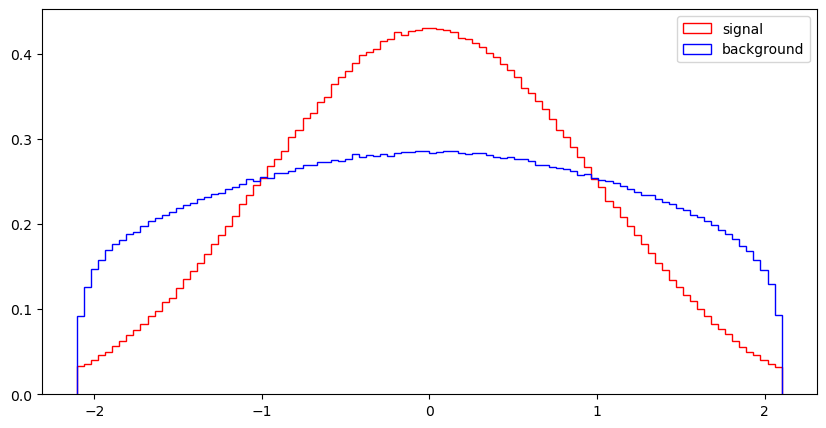

l_1_phi


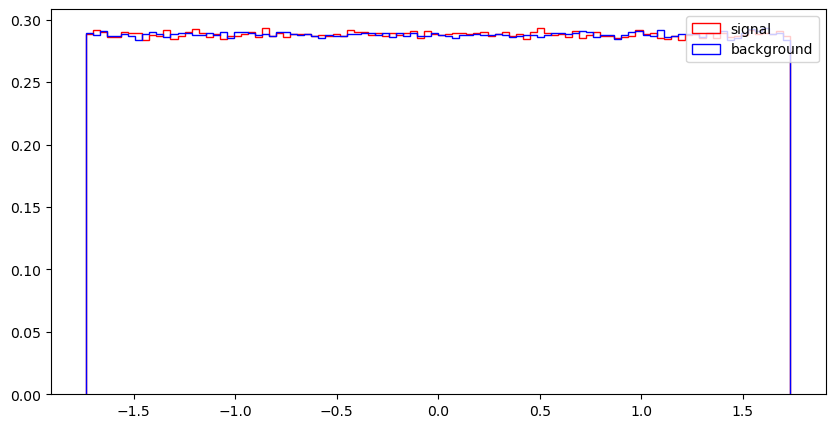

l_2_pT


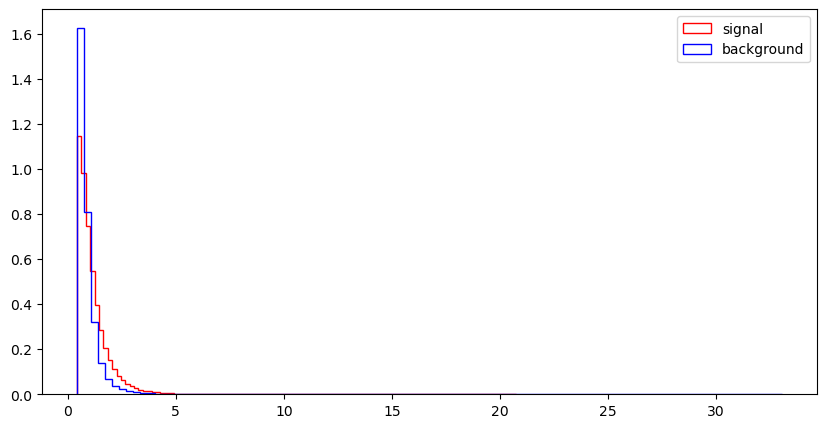

l_2_eta


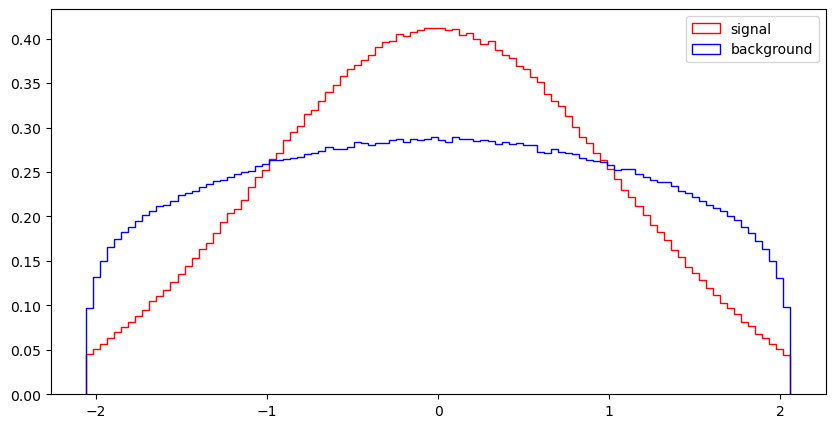

l_2_phi


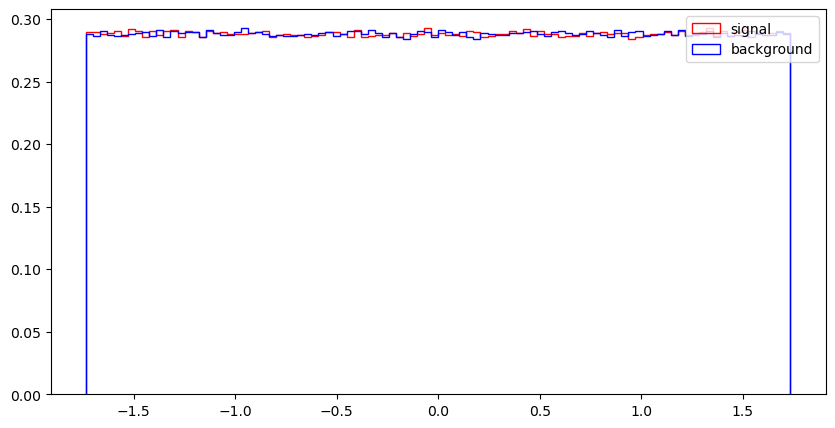

MET


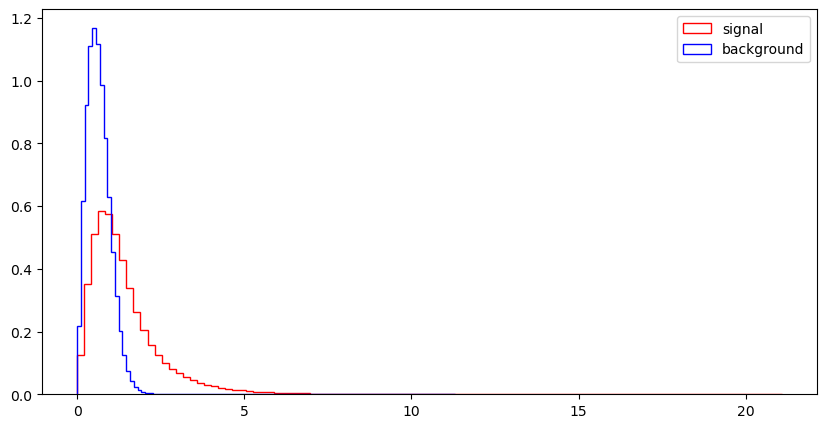

MET_phi


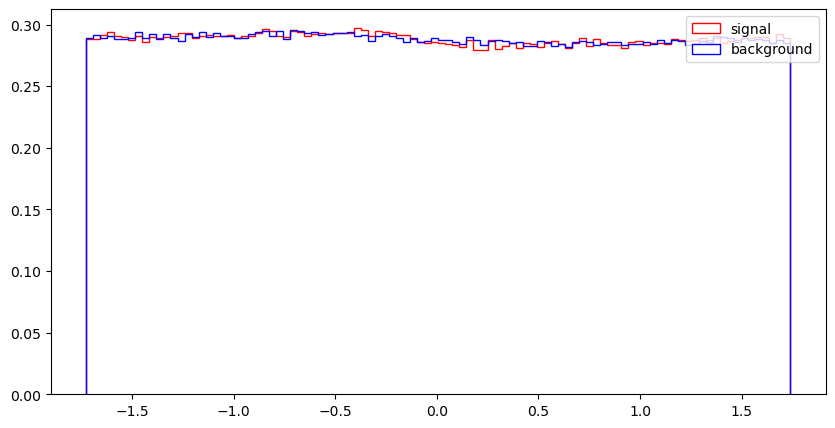

MET_rel


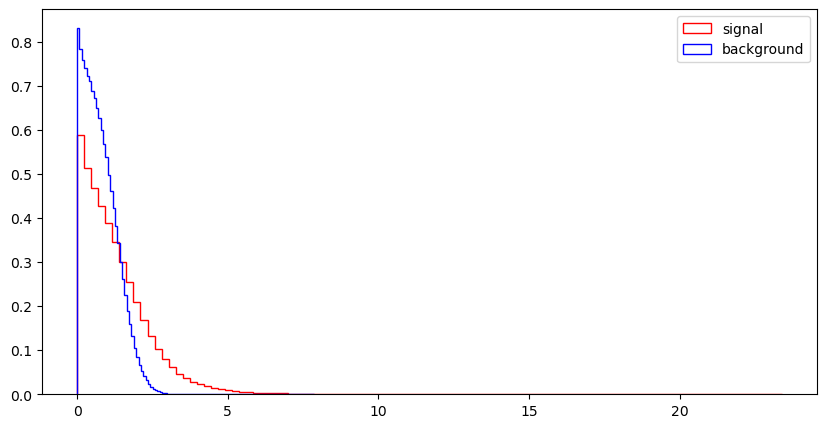

axial_MET


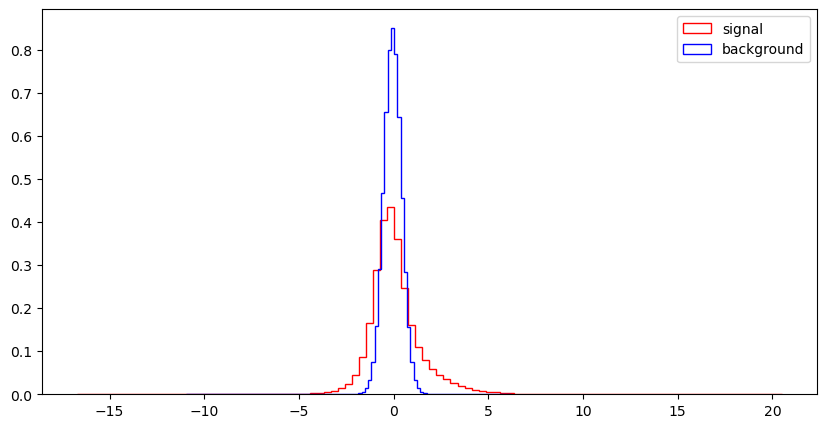

M_R


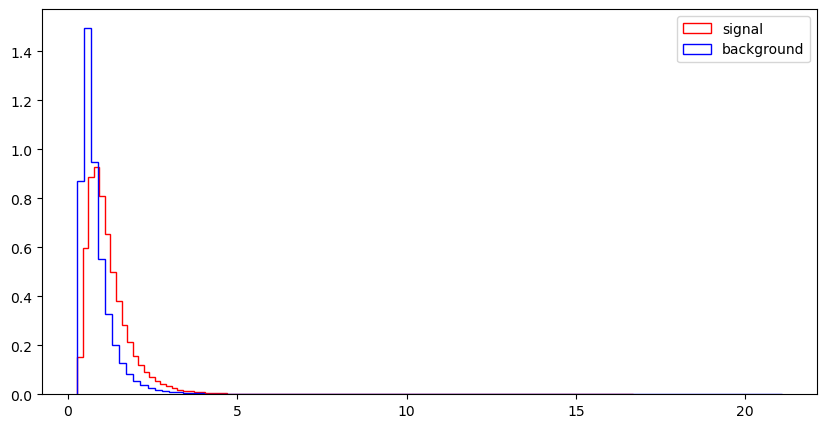

M_TR_2


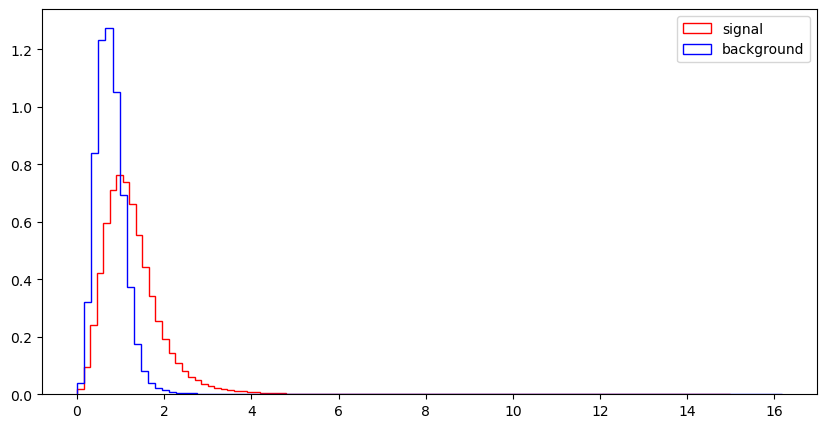

R


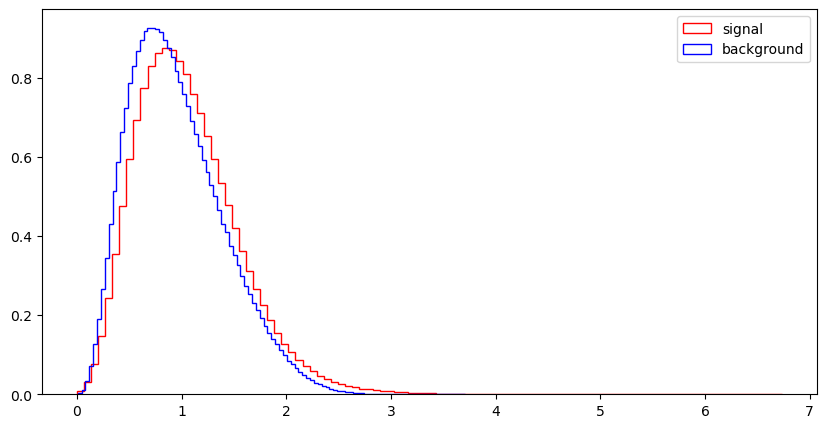

MT2


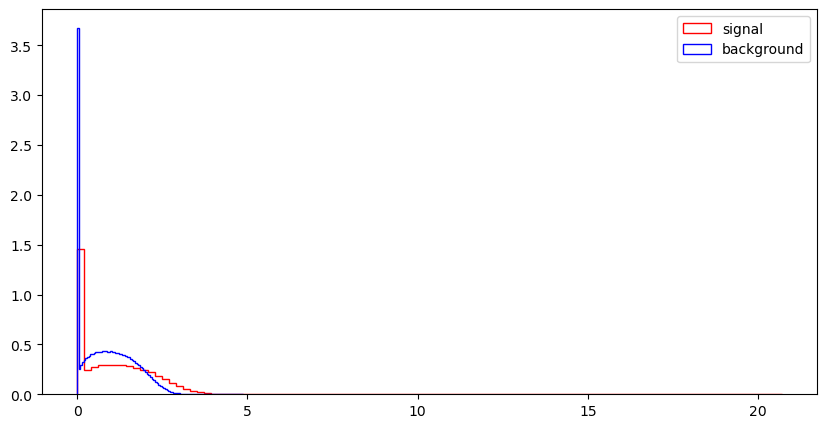

S_R


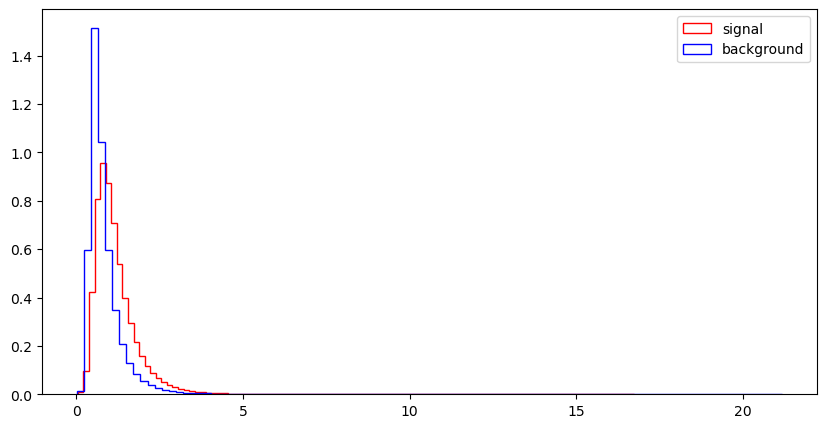

M_Delta_R


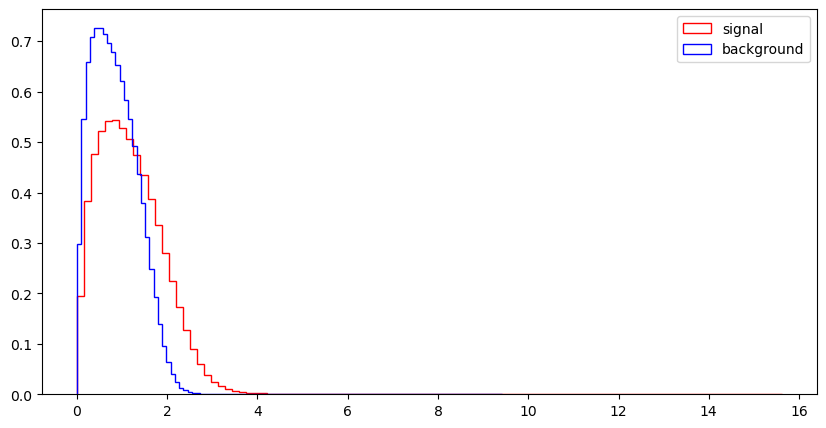

dPhi_r_b


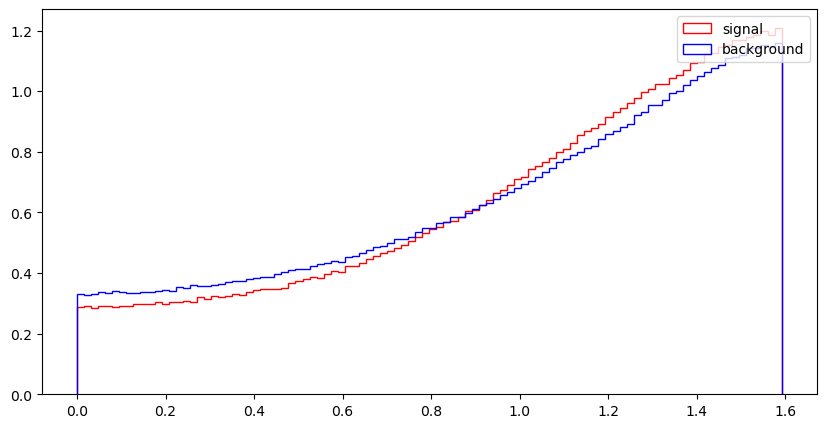

cos_theta_r1


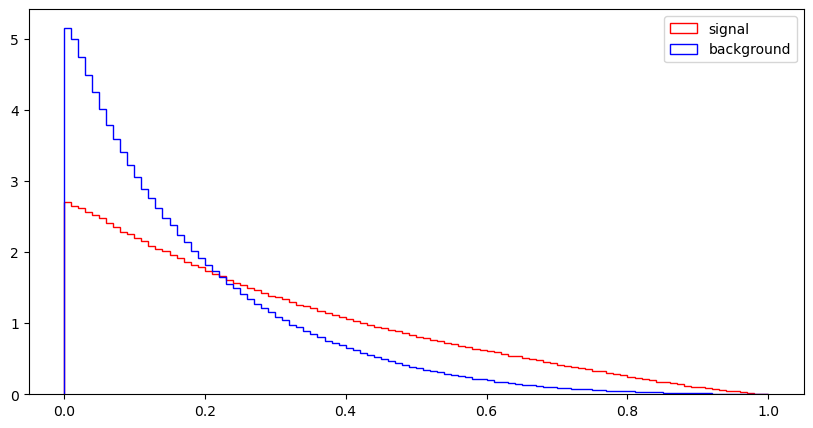

In [9]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(ax, data1, data2, bins, color1, color2, label1, label2, alpha=1.0):
    ax.hist(data1, bins=bins, histtype="step", color=color1, label=label1, density=True, stacked=True, alpha=alpha)
    ax.hist(data2, bins=bins, histtype="step", color=color2, linestyle="--", label=label2, density=True, stacked=True, alpha=alpha)
    ax.set_xlabel("Variable")
    ax.set_ylabel("Fraction of Events")
    ax.legend(loc='upper right')

def plot_variable_histograms(df_sig, df_bkg, var_names, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    num_vars = len(var_names)

    for i, var in enumerate(var_names):
        plt.subplot(5, 4, i+1)
        plot_hist(plt.gca(), df_sig[var], df_bkg[var], bins=100, color1="black", color2="red", label1="Signal", label2="Background")
        plt.xlabel(var)
        plt.ylabel("Fraction of Events")
    
    plt.tight_layout()
    plt.text(-1, -2, "\nFIG. 1: words words words words etc.", fontsize=15, ha="center")
    plt.show()

# Example usage:
plot_variable_histograms(df_sig, df_bkg, VarNames[1:])

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

def plot_hist(ax, data_signal, data_background, bins, color_signal, color_background, label_signal, label_background, title, xlabel, ylabel):
    ax.hist(data_signal, bins=bins, density=True, histtype='step', color=color_signal, label=label_signal)
    ax.hist(data_background, bins=bins, density=True, histtype='step', color=color_background, linestyle=':', label=label_background)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

plot_hist(axs[0], df[df.signal == 1]['l_1_pT'], df[df.signal == 0]['l_1_pT'], bins=50, 
          color_signal='black', color_background='red', label_signal='Signal', label_background='Background', 
          title='Lepton 1 pT [GeV]', xlabel='Lepton 1 pT [GeV]', ylabel='Fraction of Events')

plot_hist(axs[1], df[df.signal == 1]['l_2_pT'], df[df.signal == 0]['l_2_pT'], bins=100, 
          color_signal='black', color_background='red', label_signal='Signal', label_background='Background', 
          title='Lepton 2 pT [GeV]', xlabel='Lepton 2 pT [GeV]', ylabel='Fraction of Events')

plot_hist(axs[2], df[df.signal == 1]['MET'], df[df.signal == 0]['MET'], bins=100, 
          color_signal='black', color_background='red', label_signal='Signal', label_background='Background', 
          title='Sum Jet pT', xlabel='Sum Jet pT', ylabel='Fraction of Events')

plot_hist(axs[3], df[df.signal == 1]['M_TR_2'], df[df.signal == 0]['M_TR_2'], bins=100, 
          color_signal='black', color_background='red', label_signal='Signal', label_background='Background', 
          title='Missing Trans. Mom [GeV]', xlabel='Missing Trans. Mom [GeV]', ylabel='Fraction of Events')

plot_hist(axs[4], df[df.signal == 1]['MET'], df[df.signal == 0]['MET'], bins=15, 
          color_signal='black', color_background='red', label_signal='Signal', label_background='Background', 
          title='N jets', xlabel='N jets', ylabel='Fraction of Events')

plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [ ]:
import matplotlib.pyplot as plt

def pairplot_a(matrix1, matrix2, vars=None, figsize=(10, 10), marker='x', color1='g', color2='r', alpha=0.5):
    if vars is None:
        vars = matrix1.select_dtypes(include=['number']).columns.tolist()

    fig = plt.figure(figsize=figsize)

    for i, var1 in enumerate(vars):
        for j, var2 in enumerate(vars):
            ax = fig.add_subplot(len(vars), len(vars), i * len(vars) + j + 1)
            if i == j:
                ax.hist(matrix1[var1], bins=20, color=color1, alpha=alpha, label='Matrix 1')
                ax.hist(matrix2[var1], bins=20, color=color2, alpha=alpha, label='Matrix 2')
                ax.set_xlabel(var1)
                ax.set_ylabel('Frequency')
                ax.legend()
            else:
                ax.scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha, label='Matrix 1')
                ax.scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha, label='Matrix 2')
                ax.set_xlabel(var2)
                ax.set_ylabel(var1)
                ax.legend()

    plt.show()

pairplot_a(df_sig, df_bkg, vars=["l_1_pT", "l_1_eta", "l_1_phi"])

In [ ]:
def pairplot_b(matrix1, matrix2, vars=None, figsize=(10, 10), marker='x', color1='g', color2='r', alpha=0.5):
    if vars is None:
        vars = matrix1.select_dtypes(include=['number']).columns.tolist()

    num_vars = len(vars)
    fig, axes = plt.subplots(num_vars, num_vars, figsize=figsize)

    bin_edges = {var: np.histogram_bin_edges(matrix1[var], bins=20) for var in vars}

    for i, var1 in enumerate(vars):
        for j, var2 in enumerate(vars):
            ax = axes[i, j]
            if i == j:
                counts1, _ = np.histogram(matrix1[var1], bins=bin_edges[var1])
                counts2, _ = np.histogram(matrix2[var1], bins=bin_edges[var1])
                ax.hist([matrix1[var1], matrix2[var1]], bins=bin_edges[var1], color=[color1, color2], alpha=alpha, label=['Matrix 1', 'Matrix 2'])
                ax.set_xlabel(var1)
                ax.set_ylabel('Frequency')
                ax.legend()
            else:
                ax.scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha)
                ax.scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha)
                ax.set_xlabel(var2)
                ax.set_ylabel(var1)

    plt.tight_layout()
    plt.show()

pairplot_b(df_sig, df_bkg, vars=["l_1_pT", "l_1_eta", "l_1_phi", "cos_theta_r1"])

In [ ]:
# L_1_pt, l_1_eta, and cos_theta_r1

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [10]:
import tabulate
from IPython.display import HTML, display
import numpy as np

Hint: Example code for embedding a `tabulate` table into a notebook:

In [11]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [ ]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

cov_all = np.cov(df[VarNames], rowvar = False)
corr_all = np.corrcoef(df[VarNames], rowvar = False)
cov_Raw = np.cov(df[RawNames], rowvar = False)
corr_Raw = np.corrcoef(df[RawNames], rowvar = False)
cov_Feature = np.cov(df[FeatureNames], rowvar = False)
corr_Feature = np.cov(df[FeatureNames], rowvar = False)

print("Covariance all:\n", cov_all)
print("\nCorrelation all:\n", corr_all)

print("\n\nCovariance raw:\n", cov_Raw)
print("\nCorrelation raw:\n", corr_Raw)

print("\n\nCovariance Feature:\n", cov_Feature)
print("\nCorrelation Feature:\n", corr_Feature)

In [ ]:
display(HTML(tabulate.tabulate(cov_all, tablefmt='html', headers=VarNames)))
display(HTML(tabulate.tabulate(corr_all, tablefmt='html', headers=VarNames)))
display(HTML(tabulate.tabulate(cov_Raw, tablefmt='html', headers=RawNames)))
display(HTML(tabulate.tabulate(corr_Raw, tablefmt='html', headers=RawNames)))
display(HTML(tabulate.tabulate(cov_Feature, tablefmt='html', headers=FeatureNames)))
display(HTML(tabulate.tabulate(corr_Feature, tablefmt='html', headers=FeatureNames)))

In [ ]:
def cov_corr(df, low_level_features, high_level_features):
    
    feature_groups = {
        "All Features": low_level_features + high_level_features,
        "Low Level Features": low_level_features,
        "High Level Features": high_level_features
    }

    # Loop over each group of features
    for group_name, features in feature_groups.items():
        cov_matrix = np.cov(df[features], rowvar=False)
        corr_matrix = np.corrcoef(df[features], rowvar=False)
        
        print(f"Covariance - {group_name}")
        display(HTML(tabulate.tabulate(cov_matrix, tablefmt='html', headers=features, showindex=features)))
        
        print(f"Correlation - {group_name}")
        display(HTML(tabulate.tabulate(corr_matrix, tablefmt='html', headers=features, showindex=features)))

        print("\n")
cov_corr(df, RawNames, FeatureNames)

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

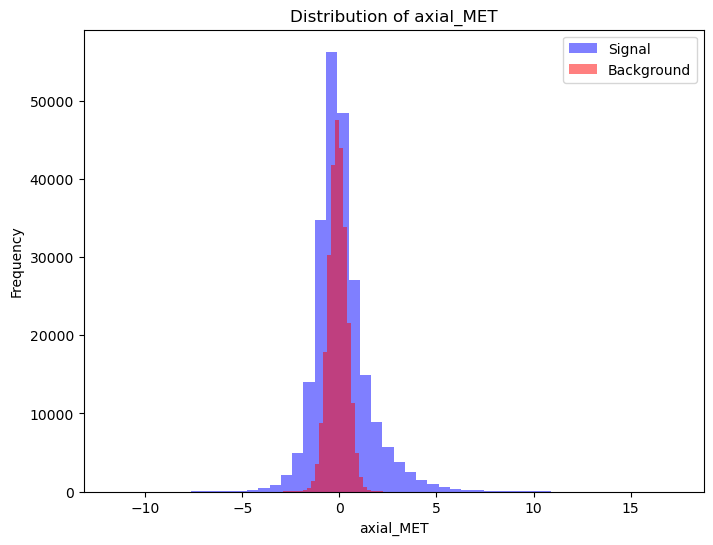

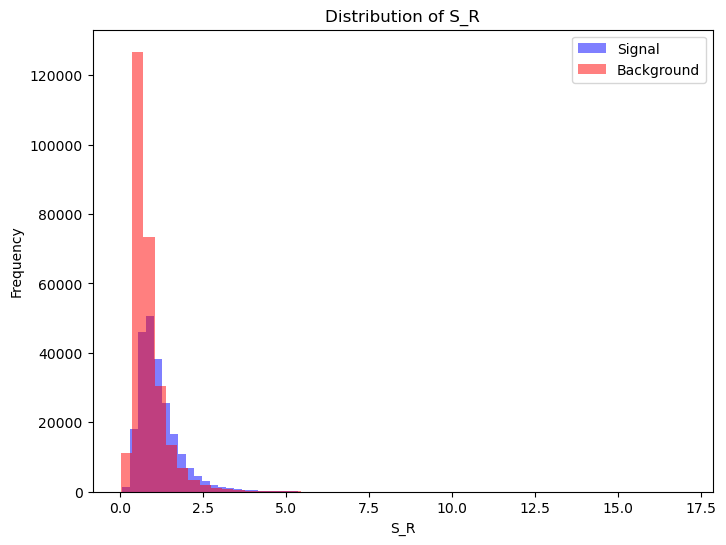

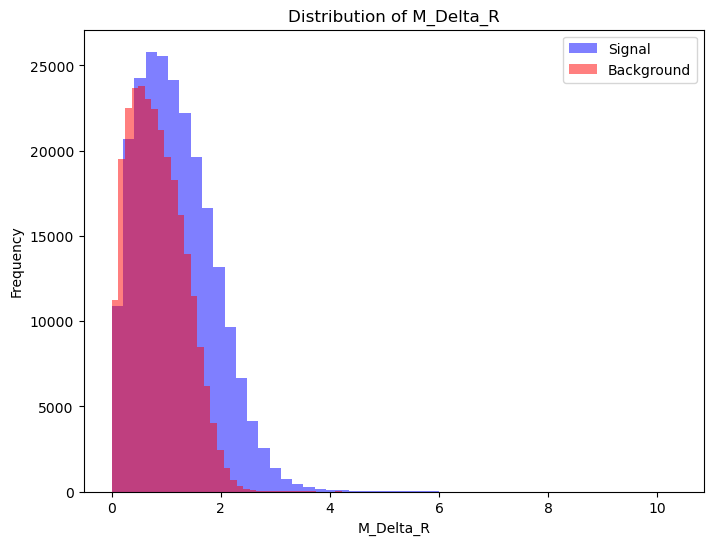

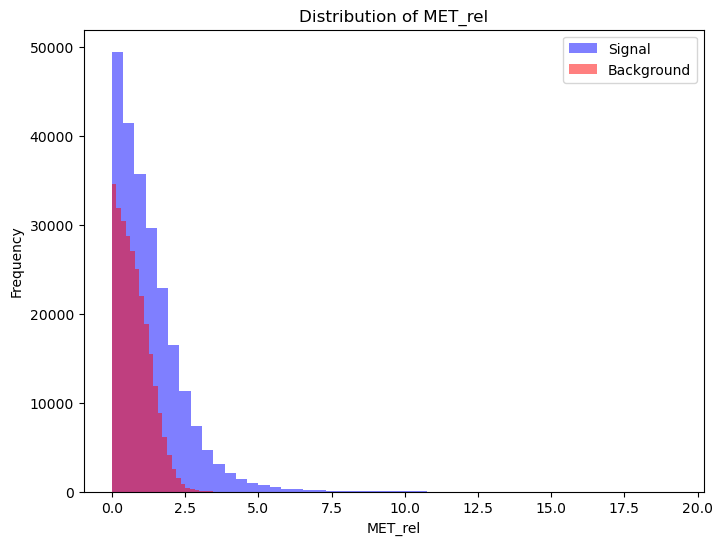

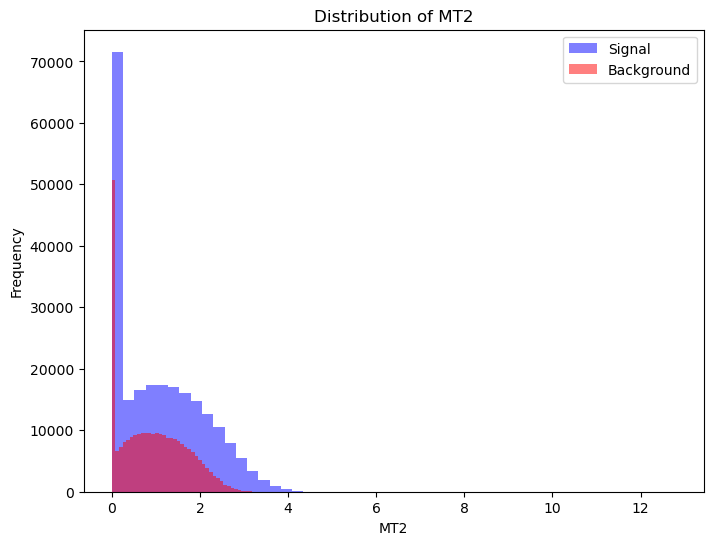

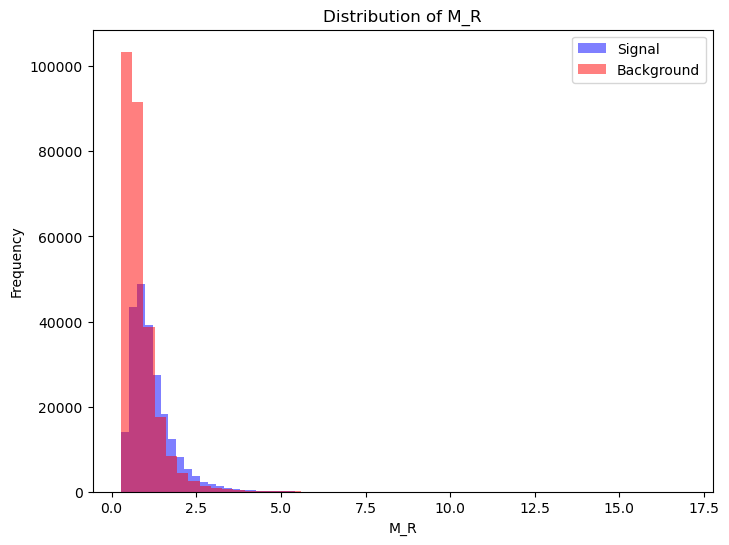

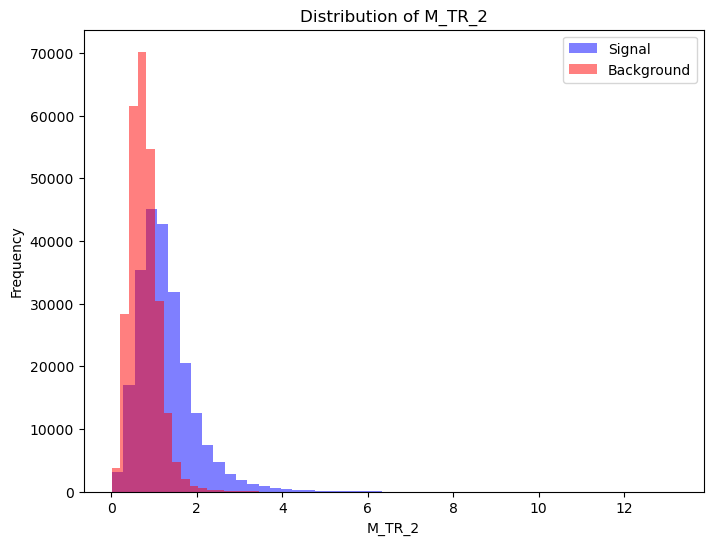

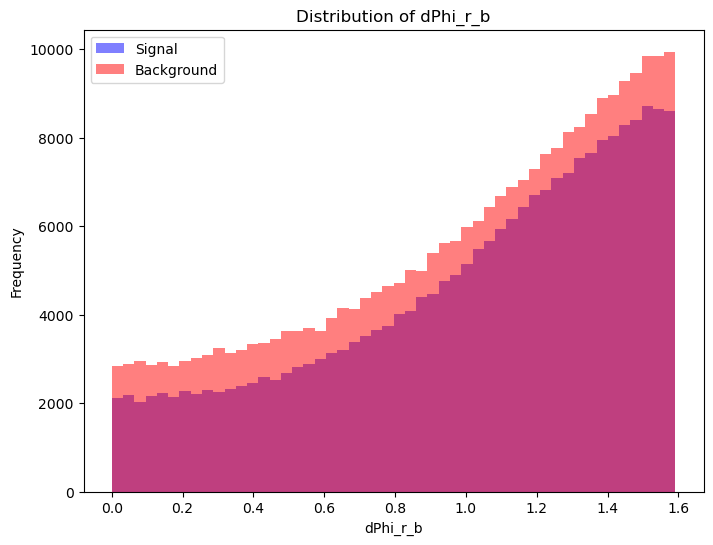

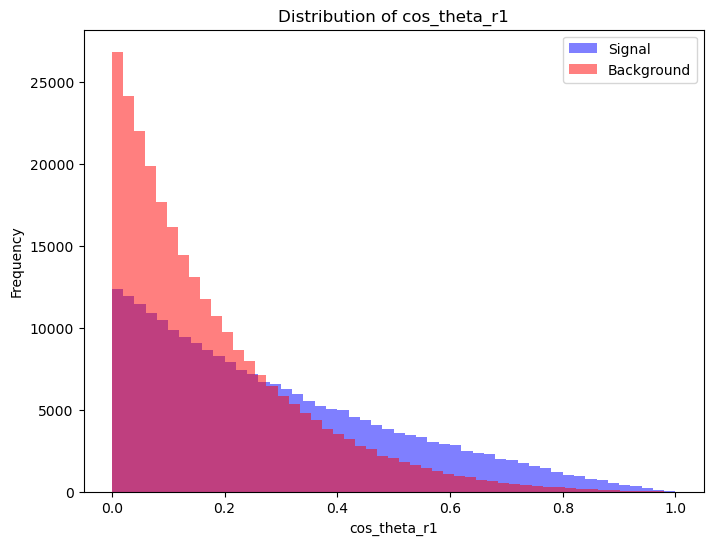

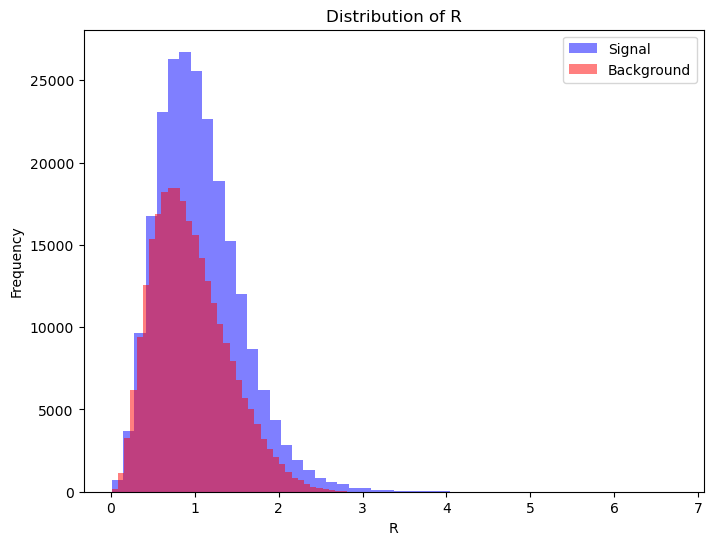

In [36]:
# Plot signal and background distributions for each observable
def plot_distributions(df_sig, df_bkg, feature):
    plt.figure(figsize=(8, 6))
    plt.hist(df_sig[feature], bins=50, alpha=0.5, label="Signal", color='blue')
    plt.hist(df_bkg[feature], bins=50, alpha=0.5, label="Background", color='red')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Distribution of {feature}")
    plt.show()

# Plot distributions for all features
for feature in FeatureNames:
    plot_distributions(df_sig, df_bkg, feature)

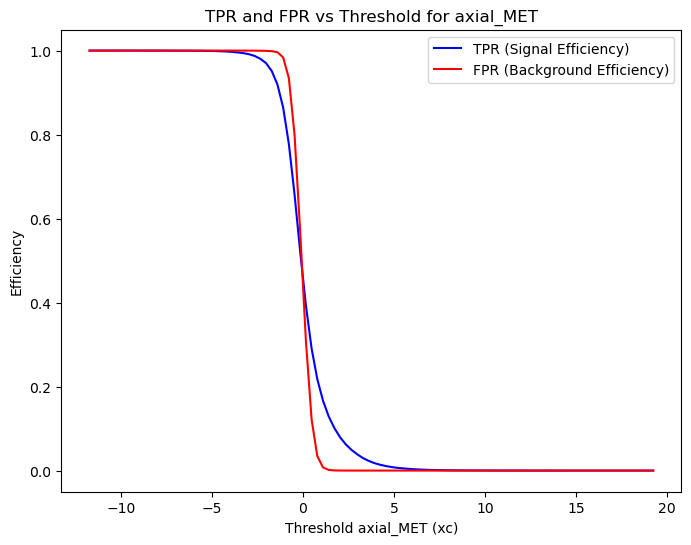

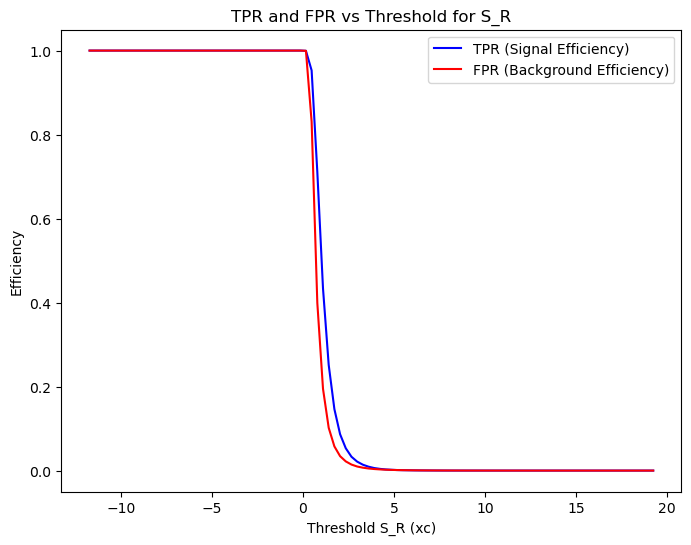

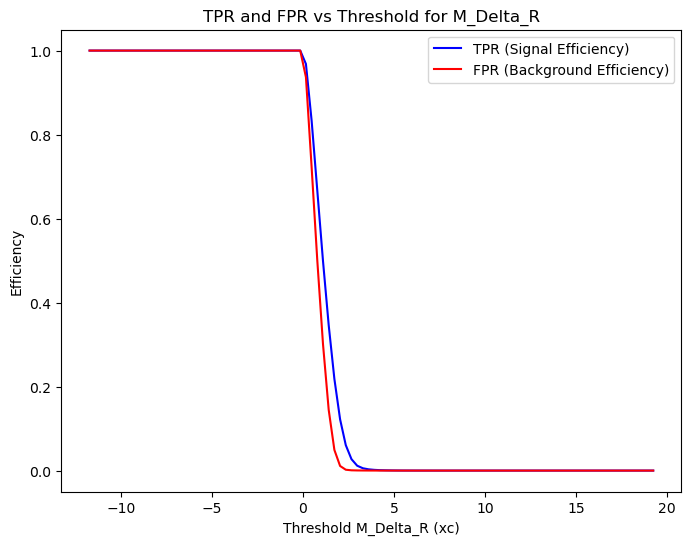

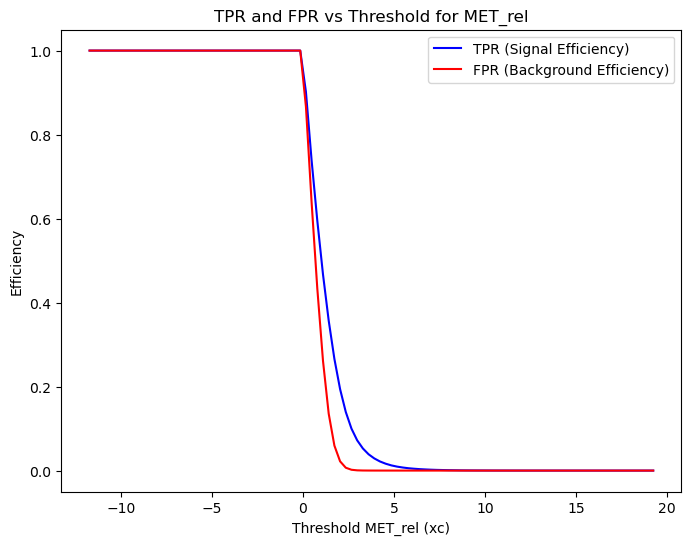

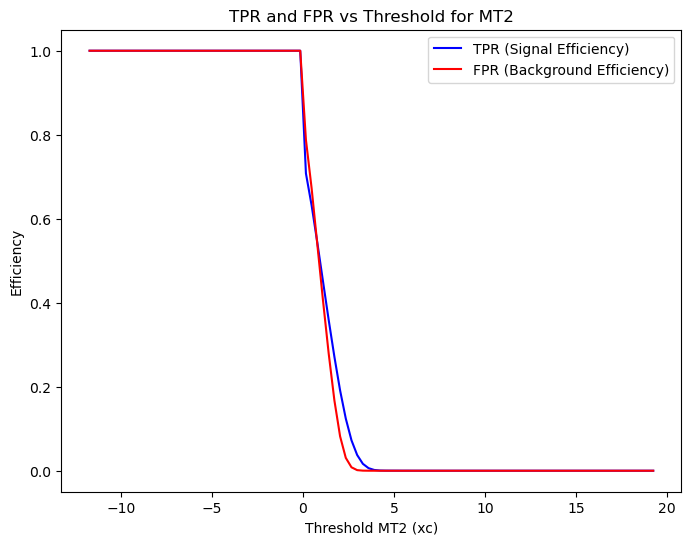

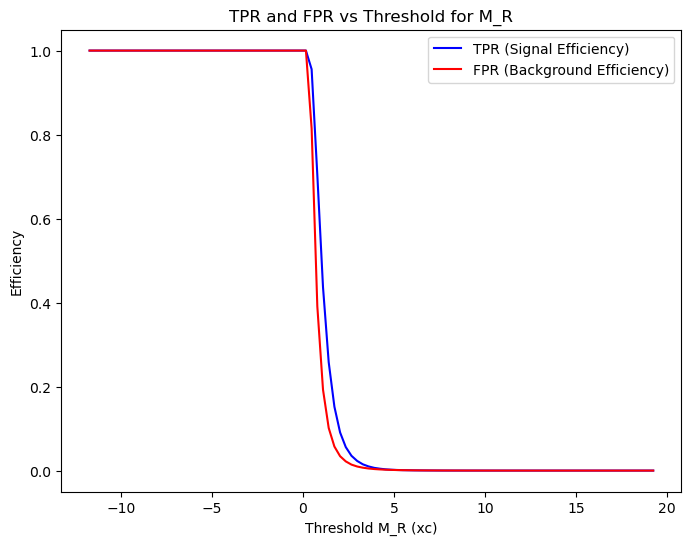

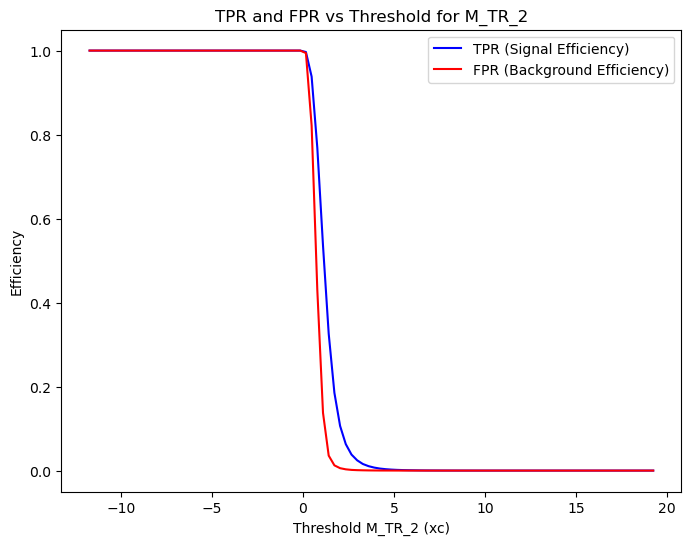

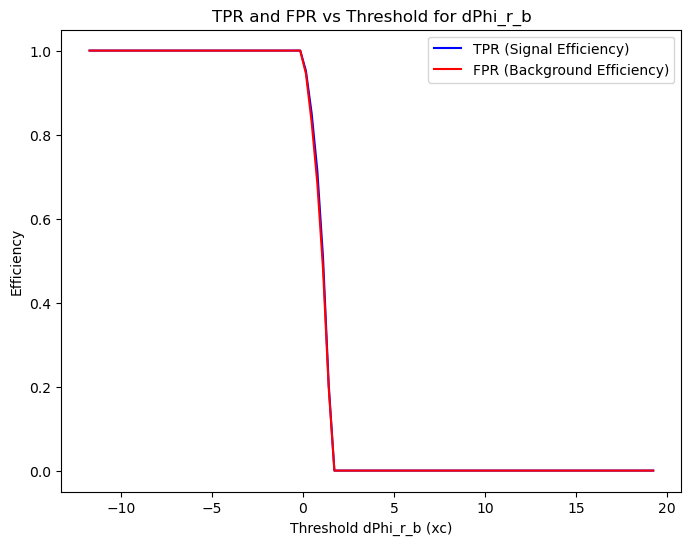

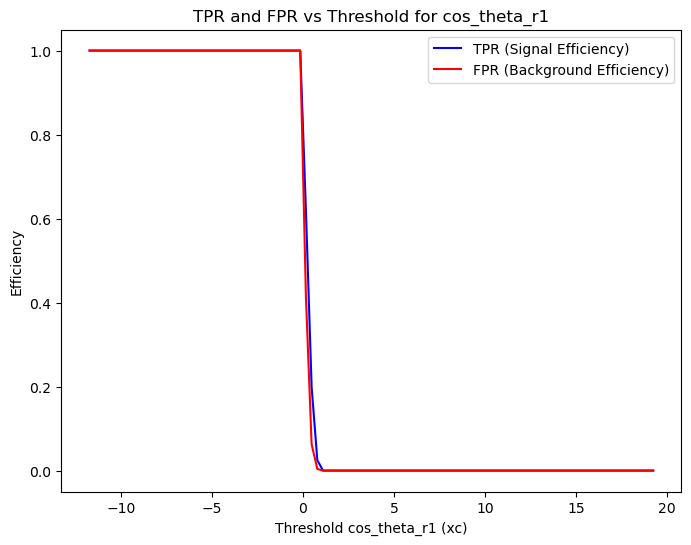

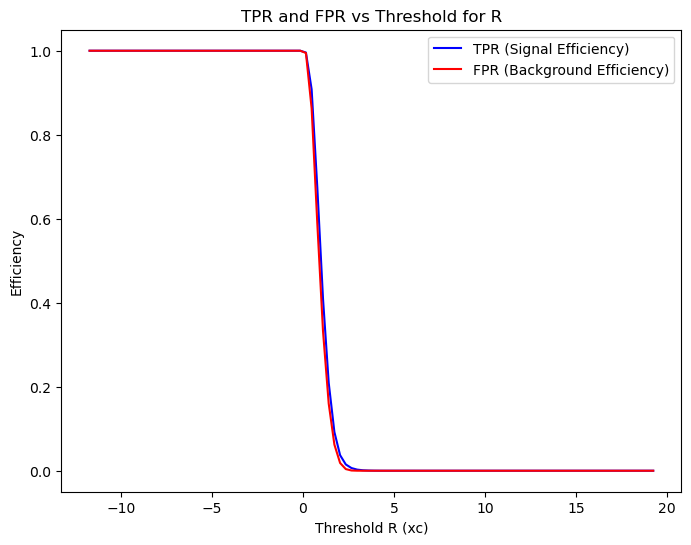

In [27]:
def calculate_tpr_fpr(df_sig, df_bkg, feature, thresholds):
    tpr = []
    fpr = []
    
    for xc in thresholds:
        # Signal efficiency (TPR)
        tpr_value = np.sum(df_sig[feature] > xc) / len(df_sig)
        
        # Background efficiency (FPR)
        fpr_value = np.sum(df_bkg[feature] > xc) / len(df_bkg)
        
        tpr.append(tpr_value)
        fpr.append(fpr_value)
    
    return np.array(tpr), np.array(fpr)

# Define thresholds to scan over
thresholds = np.linspace(df[FeatureNames].min().min(), df[FeatureNames].max().max(), 100)

# Plot TPR and FPR for each feature
for feature in FeatureNames:
    tpr, fpr = calculate_tpr_fpr(df_sig, df_bkg, feature, thresholds)
    
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, tpr, label="TPR (Signal Efficiency)", color='blue')
    plt.plot(thresholds, fpr, label="FPR (Background Efficiency)", color='red')
    plt.xlabel(f"Threshold {feature} (xc)")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.title(f"TPR and FPR vs Threshold for {feature}")
    plt.show()

/tmp/ipykernel_1050/3246408600.py:4: RuntimeWarning: invalid value encountered in divide
  significance = n_s_prime / np.sqrt(n_s_prime + n_b_prime)


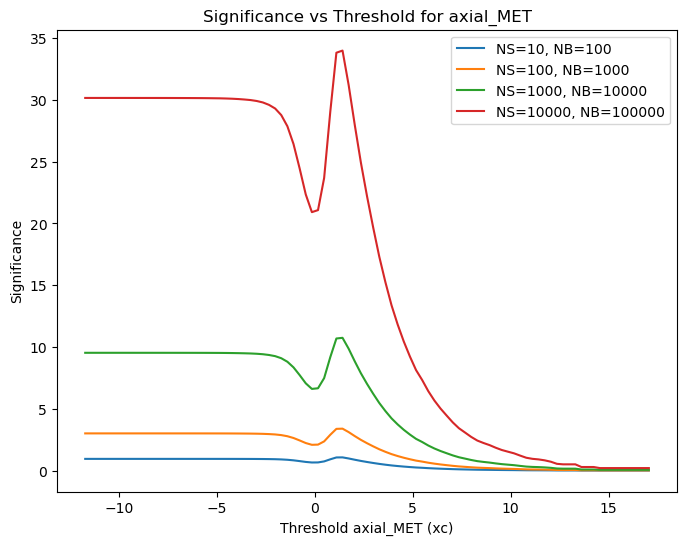

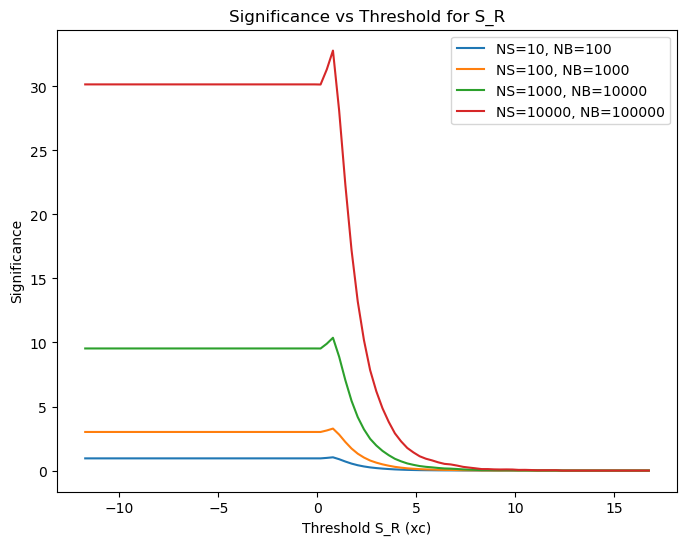

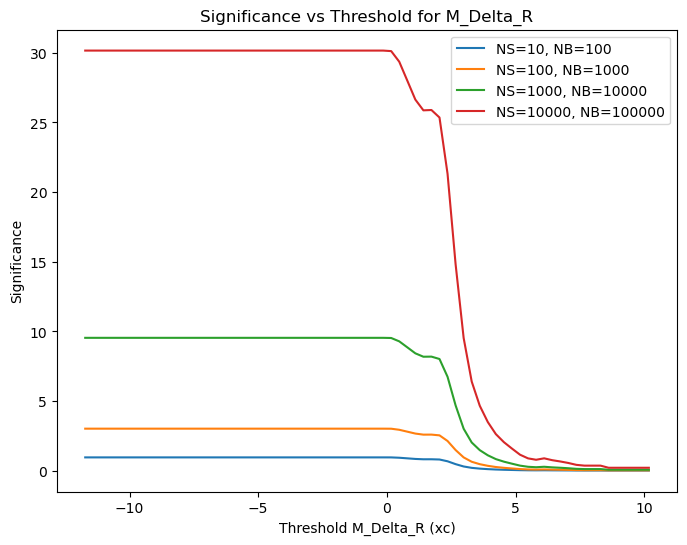

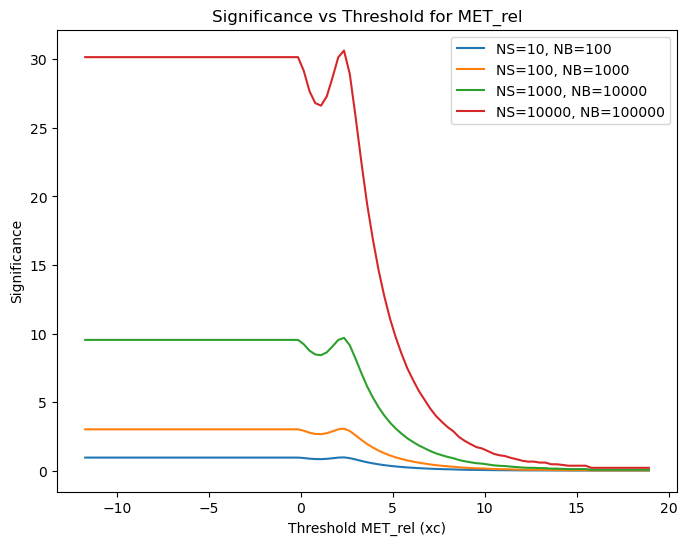

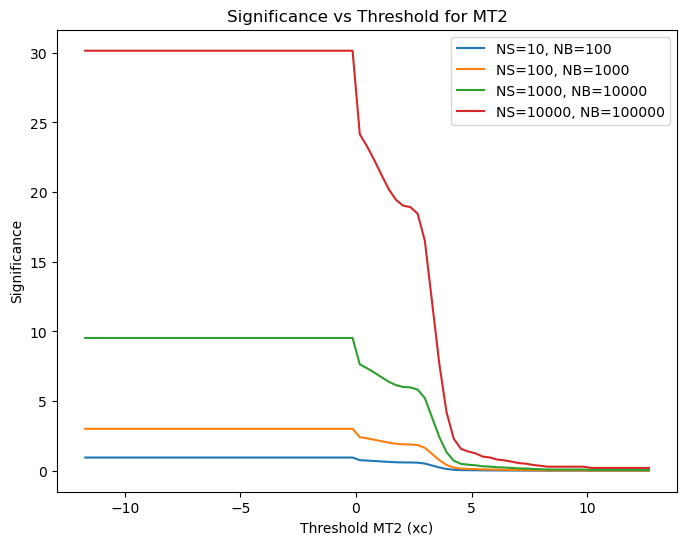

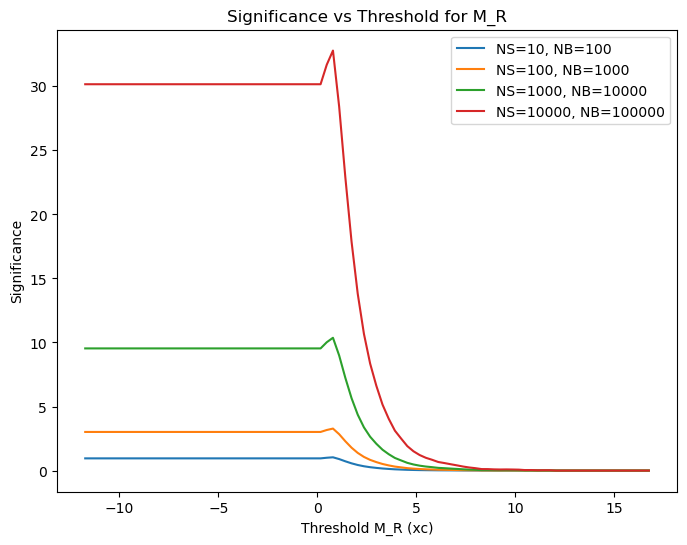

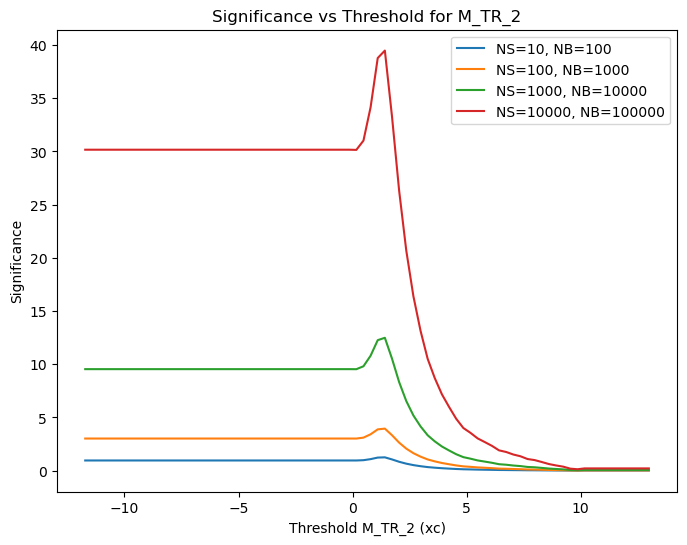

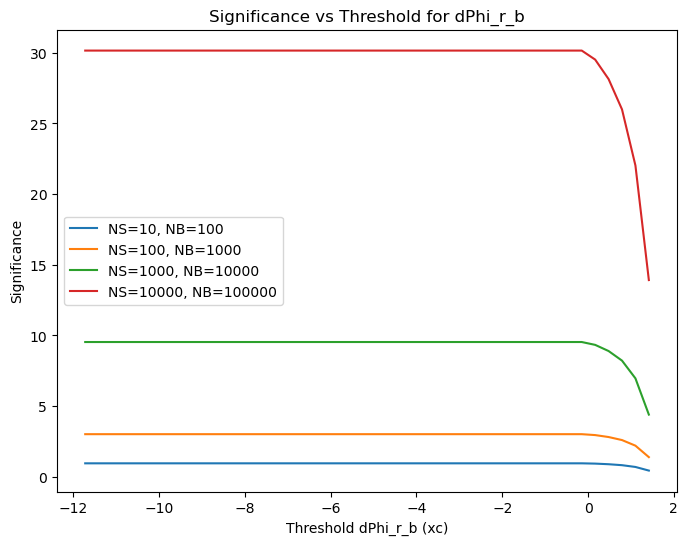

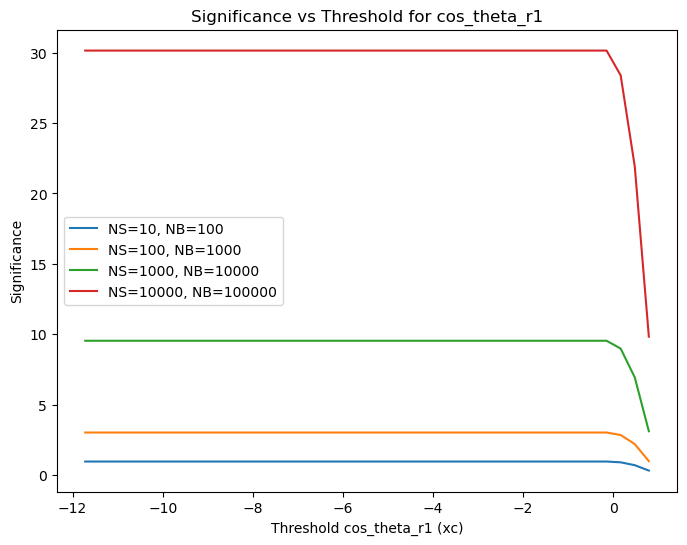

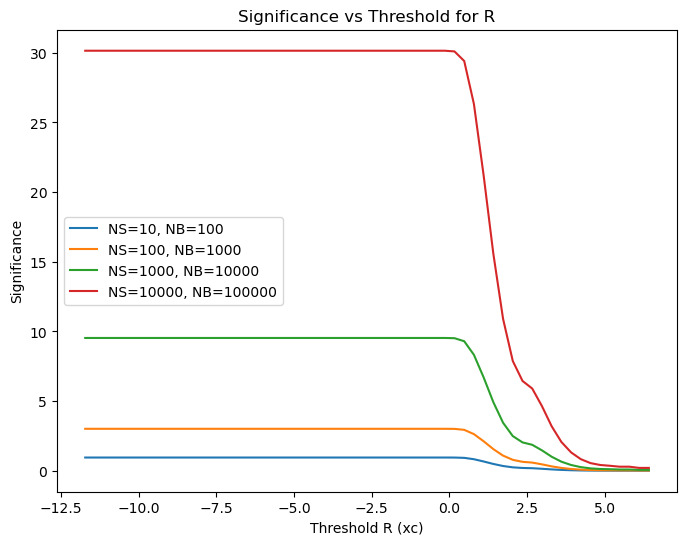

In [44]:


def calculate_significance(tpr, fpr, ns, nb):
    n_s_prime = tpr * ns
    n_b_prime = fpr * nb
    significance = n_s_prime / np.sqrt(n_s_prime + n_b_prime)
    return significance

# Define scenarios
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

# Plot significance for each feature and scenario
for feature in FeatureNames:
    tpr, fpr = calculate_tpr_fpr(df_sig, df_bkg, feature, thresholds)
    
    plt.figure(figsize=(8, 6))
    for ns, nb in scenarios:
        significance = calculate_significance(tpr, fpr, ns, nb)
        plt.plot(thresholds, significance, label=f"NS={ns}, NB={nb}")
    
    plt.xlabel(f"Threshold {feature} (xc)")
    plt.ylabel("Significance")
    plt.legend()
    plt.title(f"Significance vs Threshold for {feature}")
    plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [22]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from IPython.display import display, HTML

# Function to apply a selection cut
def apply_cut(df_sig, df_bkg, feature, threshold, cut_type=">"):
    if cut_type == ">":
        df_sig_cut = df_sig[df_sig[feature] > threshold]
        df_bkg_cut = df_bkg[df_bkg[feature] > threshold]
    elif cut_type == "<":
        df_sig_cut = df_sig[df_sig[feature] < threshold]
        df_bkg_cut = df_bkg[df_bkg[feature] < threshold]

    # Prevent division by zero
    len_sig = len(df_sig)
    len_bkg = len(df_bkg)

    epsilon_S = len(df_sig_cut) / len_sig if len_sig > 0 else 0
    epsilon_B = len(df_bkg_cut) / len_bkg if len_bkg > 0 else 0

    return df_sig_cut, df_bkg_cut, epsilon_S, epsilon_B

# Define scenarios (N_S, N_B)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000),
]

# Selected observables and thresholds (Example values; adjust based on significance analysis)
selected_observables = {
    "Scenario 1": [("MET", 50, ">"), ("M_R", 300, ">"), ("MT2", 100, "<")],
    "Scenario 2": [("MET", 80, ">"), ("M_TR_2", 400, ">"), ("S_R", 0.8, "<")],
    "Scenario 3": [("MET", 100, ">"), ("M_Delta_R", 2, "<"), ("R", 0.7, ">")],
    "Scenario 4": [("MET", 120, ">"), ("cos_theta_r1", 0.5, "<"), ("dPhi_r_b", 1, "<")],
}

# Process each scenario
for (NS, NB), scenario_name in zip(scenarios, selected_observables.keys()):
    df_sig_cut = df_sig.copy()
    df_bkg_cut = df_bkg.copy()
    
    # Table header
    table_data = []
    table_data.append(["Initial", 1.000, 1.000, NS, NB, NS / np.sqrt(NS + NB)])

    # Apply cuts
    for feature, threshold, cut_type in selected_observables[scenario_name]:
        df_sig_cut, df_bkg_cut, epsilon_S, epsilon_B = apply_cut(df_sig_cut, df_bkg_cut, feature, threshold)

        if len(df_sig_cut) == 0 or len(df_bkg_cut) == 0:
            table_data.append([feature, epsilon_S, epsilon_B, 0, 0, 0])
            break  # Stop if no events are left

        N_S_prime = epsilon_S * NS
        N_B_prime = epsilon_B * NB
        sigma_S_prime = N_S_prime / np.sqrt(N_S_prime + N_B_prime) if (N_S_prime + N_B_prime) > 0 else 0

        table_data.append([feature, epsilon_S, epsilon_B, round(N_S_prime, 1), round(N_B_prime, 1), round(sigma_S_prime, 3)])

    # Display table
    display(HTML(tabulate(table_data, headers=["Cut", "ε_S", "ε_B", "N_S'", "N_B'", "σ_S'"], tablefmt="html")))

Cut,ε_S,ε_B,N_S',N_B',σ_S'
Initial,1,1,10,100,0.953463
MET,0,0,0,0,0


Cut,ε_S,ε_B,N_S',N_B',σ_S'
Initial,1,1,100,1000,3.01511
MET,0,0,0,0,0


Cut,ε_S,ε_B,N_S',N_B',σ_S'
Initial,1,1,1000,10000,9.53463
MET,0,0,0,0,0


Cut,ε_S,ε_B,N_S',N_B',σ_S'
Initial,1,1,10000,100000,30.1511
MET,0,0,0,0,0


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



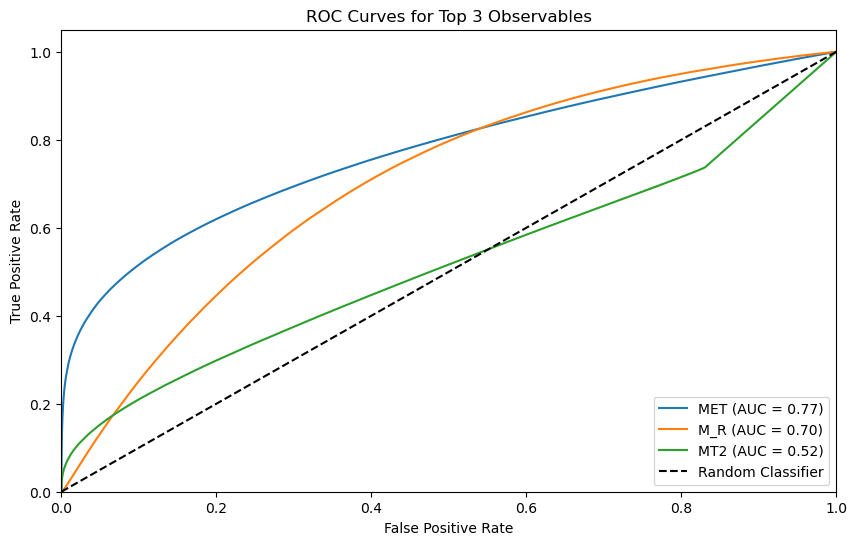

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to calculate ROC and AUC for a given feature
def plot_roc_curve(df_sig, df_bkg, features):
    plt.figure(figsize=(10, 6))
    
    # Loop through each feature to plot ROC curve
    for feature in features:
        # Concatenate signal and background data
        y_true = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
        y_scores = np.concatenate([df_sig[feature], df_bkg[feature]])

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        auc_score = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc_score:.2f})')

    # Plotting formatting
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Top 3 Observables')
    plt.legend(loc="lower right")
    plt.show()

# Define the top 3 observables based on previous analysis
top_3_observables = ["MET", "M_R", "MT2"]

# Plot ROC curves for the top 3 observables
plot_roc_curve(df_sig, df_bkg, top_3_observables)

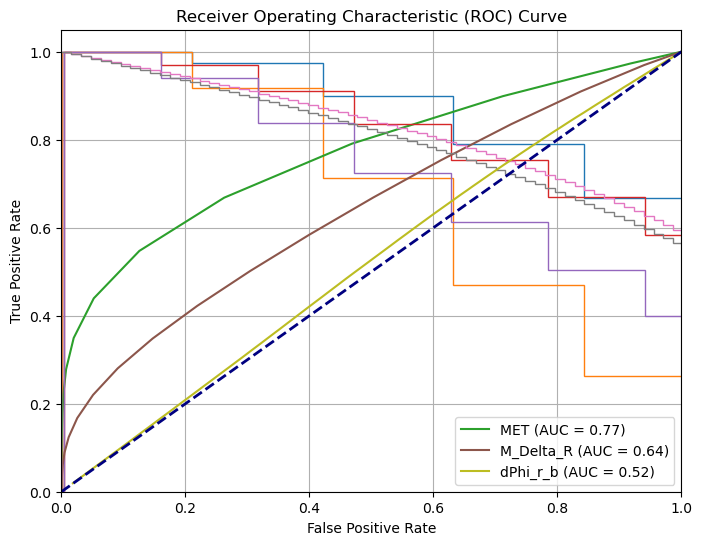

{'MET': {'Signal Efficiency': 0.40041882537447104, 'Background Efficiency': 0.03547303214064885, 'Number of Selected Signal Events': 916089, 'Number of Selected Background Events': 96209, 'Significance': 910.5073982047383}, 'M_Delta_R': {'Signal Efficiency': 0.37550347993969824, 'Background Efficiency': 0.1726036650316923, 'Number of Selected Signal Events': 859087, 'Number of Selected Background Events': 468131, 'Significance': 745.7032152939784}, 'dPhi_r_b': {'Signal Efficiency': 0.2758980464869066, 'Background Efficiency': 0.2638489506384733, 'Number of Selected Signal Events': 631207, 'Number of Selected Background Events': 715604, 'Significance': 543.899273969469}}


In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(df_sig, df_bkg, observations, bins=100, cumulative=-1, density=True, figsize=(8, 6), title=None):
    plt.figure(figsize=figsize)
    for observation in observations:
        # ROC curve: Compute histogram for signal and background
        TPR, bins_sig, _ = plt.hist(df_sig[observation], bins=bins, histtype="step", cumulative=cumulative, density=density)
        FPR, _, _ = plt.hist(df_bkg[observation], bins=bins_sig, histtype="step", cumulative=cumulative, density=density)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(FPR, TPR)
        
        # Plot ROC curve
        plt.plot(FPR, TPR, label=f'{observation} (AUC = {roc_auc:.2f})')

    # Plot a diagonal line representing random classifier
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    if title:
        plt.title(title)
    plt.show()

# Function to create a cut-flow table
def create_cut_flow_table(df_sig, df_bkg, observations, threshold):
    results = {}
    for observation in observations:
        # Apply selection (cut) based on threshold
        mask_sig = df_sig[observation] > threshold
        mask_bkg = df_bkg[observation] > threshold
        
        # Number of selected events for signal and background
        N_S = sum(mask_sig)
        N_B = sum(mask_bkg)
        
        # Compute efficiencies
        eff_S = N_S / len(df_sig)  # Signal efficiency
        eff_B = N_B / len(df_bkg)  # Background efficiency
        
        # Compute significance
        significance = N_S / (N_S + N_B) ** 0.5  # Signal significance
        
        # Store results for this observable
        results[observation] = {'Signal Efficiency': eff_S,
                                'Background Efficiency': eff_B,
                                'Number of Selected Signal Events': N_S,
                                'Number of Selected Background Events': N_B,
                                'Significance': significance}
    return results

# Define observations
obs = ['MET', 'M_Delta_R', 'dPhi_r_b']

# Plot ROC curves for the specified observations
plot_roc_curve(df_sig, df_bkg, obs)

# Create cut-flow table with a threshold value
cut_flow_results = create_cut_flow_table(df_sig, df_bkg, obs, 1.35029)

# Print the results of the cut-flow table
print(cut_flow_results)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 